In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ncf = pd.read_csv("./SD_analysis_random_ncf2_5.csv")
nk2 = pd.read_csv("./SD_analysis_random_nk2.csv")
nk3 = pd.read_csv("./SD_analysis_random_nk3.csv")
bbm = pd.read_csv("./SD_analysis_bbm-bnet-inputs-random.csv")
bbm_agg = bbm.copy()
bbm_agg["name"] = bbm_agg["name"].apply(lambda x: x.split("_")[0].removesuffix(".bnet"))
bbm_agg = bbm_agg.groupby("name").mean().reset_index()

In [3]:
ncf.head()

,name,N,sd size,depth,attractors,motif-avoidant-attractors,minimal trapspaces
0,n10_0.bnet,10,8,3,3,0,3
1,n10_1.bnet,10,1,0,1,0,1
2,n10_10.bnet,10,2,1,1,0,1
3,n10_11.bnet,10,3,2,1,0,1
4,n10_12.bnet,10,3,1,2,0,2


In [4]:
nk2.head()

,name,N,sd size,depth,attractors,motif-avoidant-attractors,minimal trapspaces
0,n10_0.bnet,10,2.0,1.0,1.0,0.0,1.0
1,n10_1.bnet,10,2.0,1.0,1.0,0.0,1.0
2,n10_10.bnet,10,2.0,1.0,1.0,0.0,1.0
3,n10_11.bnet,10,2.0,1.0,1.0,0.0,1.0
4,n10_12.bnet,10,2.0,1.0,1.0,0.0,1.0


In [5]:
nk3.head()

,name,N,sd size,depth,attractors,motif-avoidant-attractors,minimal trapspaces
0,n10_0,10,17.0,4.0,2.0,0.0,2.0
1,n10_1,10,12.0,3.0,5.0,0.0,5.0
2,n10_10,10,1.0,0.0,1.0,0.0,1.0
3,n10_100,10,NaN,NaN,2.0,0.0,2.0
4,n10_101,10,NaN,NaN,5.0,0.0,5.0


In [6]:
bbm.head()

,name,N,sd size,depth,attractors,motif-avoidant-attractors,minimal trapspaces
0,001_0000000000011111000.bnet,321.0,1.0,0.0,1.0,0.0,1.0
1,001_0000001000011000011.bnet,321.0,1.0,0.0,1.0,0.0,1.0
2,001_0000001000110110001.bnet,321.0,1.0,0.0,1.0,0.0,1.0
3,001_0000010000000111100.bnet,321.0,1.0,0.0,1.0,0.0,1.0
4,001_0000010011101011100.bnet,321.0,1.0,0.0,1.0,0.0,1.0


In [7]:
bbm_agg.head()

,name,N,sd size,depth,attractors,motif-avoidant-attractors,minimal trapspaces
0,001,321.0,1.031250,0.015625,1.015625,0.0,1.015625
1,002,139.0,2149.111111,13.444444,NaN,NaN,6.666667
2,003,20.0,2.000000,0.500000,1.500000,0.0,1.500000
3,004,NaN,NaN,NaN,NaN,NaN,NaN
4,005,28.0,7.000000,4.000000,1.000000,0.0,1.000000


In [8]:
frames = {
    "Nested Cannalizing": ncf,
    "Critical NK (K=2)": nk2,
    "Critical NK (K=3)": nk3,
    "BBM (Fixed)": bbm,
    "BBM (Aggregate)": bbm_agg,
}
network_type_colors = {
    "Nested Cannalizing": "#228833",
    "Critical NK (K=2)": "#66ccee",
    "Critical NK (K=3)": "#4477aa",
    "BBM (Fixed)": "#ee6677",
    "BBM (Aggregate)": "#aa3377",
}

In [9]:
bins = np.log2(sorted(ncf["N"].unique()))
lbins = bins - 0.5
rbins = bins + 0.5
nbins = len(bins)
bins

array([3.32192809, 4.32192809, 5.32192809, 6.32192809, 7.32192809,
       8.32192809])

In [10]:
for name, df in frames.items():
    df["bin"] = np.digitize(np.log2(df["N"]), bins)
    df["network_id"] = df["name"].apply(lambda x: x.split("_")[0])

In [11]:
{
    name: pd.merge(df.groupby("bin")["N"].min(), df.groupby("bin")["N"].max(), on="bin")
    for name, df in frames.items()
}

{'Nested Cannalizing':      N_x  N_y
 bin          
 1     10   10
 2     20   20
 3     40   40
 4     80   80
 5    160  160
 6    320  320,
 'Critical NK (K=2)':      N_x   N_y
 bin           
 0      5     5
 1     10    10
 2     20    20
 3     40    40
 4     80    80
 5    160   160
 6    320  2560,
 'Critical NK (K=3)':      N_x  N_y
 bin          
 0      5    5
 1     10   10
 2     20   20
 3     40   40
 4     80   80
 5    160  160
 6    320  320,
 'BBM (Fixed)':        N_x    N_y
 bin              
 0      5.0    9.0
 1     10.0   19.0
 2     20.0   39.0
 3     40.0   79.0
 4     80.0  150.0
 5    164.0  252.0
 6    321.0  321.0,
 'BBM (Aggregate)':        N_x    N_y
 bin              
 0      5.0    9.0
 1     10.0   19.0
 2     20.0   39.0
 3     40.0   79.0
 4     80.0  150.0
 5    164.0  252.0
 6    321.0  321.0}

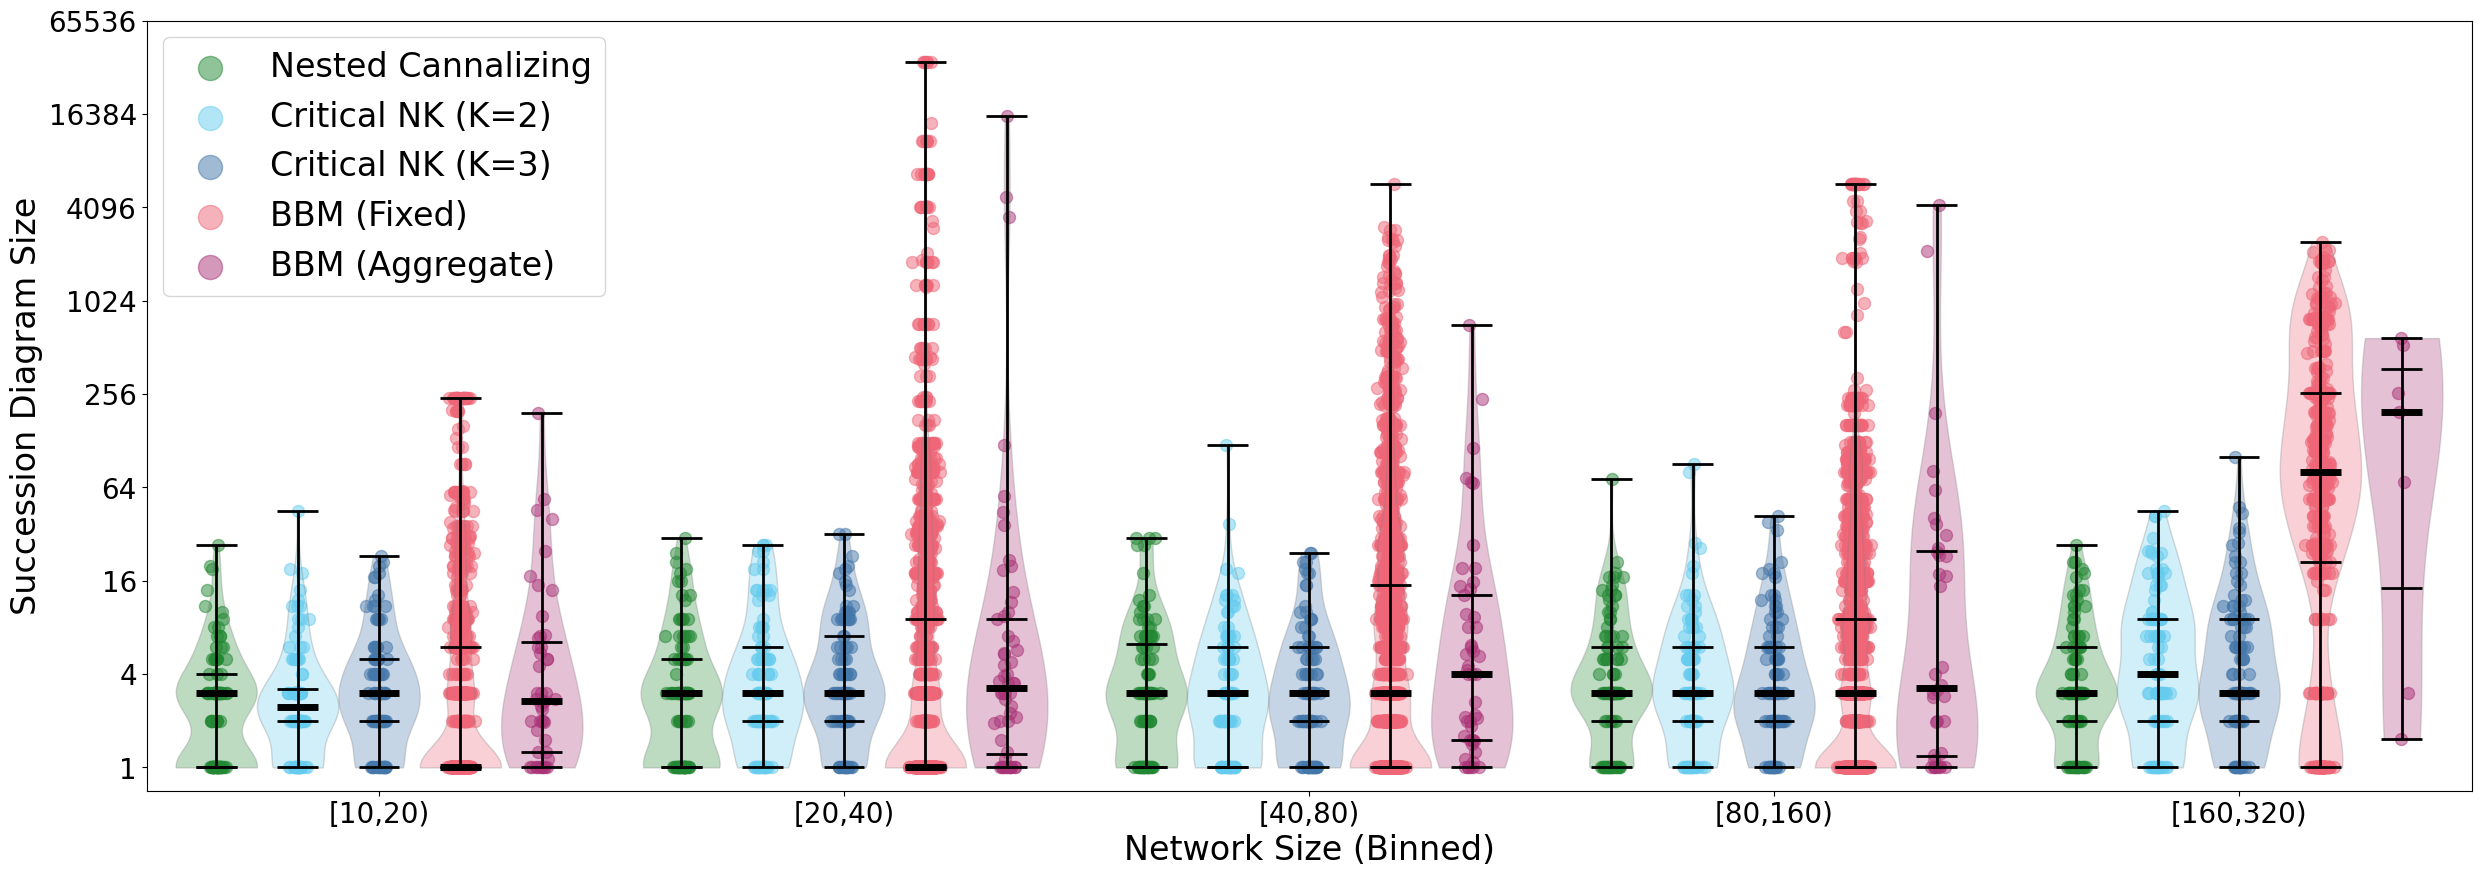

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
hscale = 0.175
for name_pos, (name, df) in enumerate(frames.items()):
    for bin in range(nbins + 1):
        arr = np.log2(
            # df["sd size"][(df["bin"] == bin) & (df["N"] >= 0) & (df["N"] < 640)]
            df["sd size"][(df["bin"] == bin) & (df["N"] >= 10) & (df["N"] < 320)]
        )
        arr = arr[~np.isnan(arr)]
        ax.scatter(
            bin + (name_pos - 2) * hscale + np.random.normal(0, 0.01, len(arr)),
            arr + 0 * np.random.normal(0, 0.025, len(arr)),
            alpha=0.5,
            color=network_type_colors[name],
            label=name if bin == 0 else None,
            s=75,
        )
        if len(set(arr)) > 4:
            vp = ax.violinplot(
                arr,
                [bin + (name_pos - 2) * hscale],
                widths=hscale,
                quantiles=[0.25, 0.75],
                showmedians=True,
            )
            for partname in vp:
                if partname == "bodies":
                    continue
                vp[partname].set_edgecolor("black")
                vp[partname].set_linewidth(2)

            vp["cmedians"].set_linewidth(5)
            # vp["cmeans"].set_color("red")

            for body in vp["bodies"]:
                body.set_facecolor(network_type_colors[name])
                body.set_edgecolor("grey")
                body.set_alpha(0.3)

ax.legend(fontsize=24, markerscale=2, loc="upper left")

ax.set_xlabel("Network Size (Binned)", fontsize=24)
ax.set_ylabel("Succession Diagram Size", fontsize=24)
xticks = ax.get_xticks().tolist()
ax.set_xticks(xticks)
ax.set_xticklabels([f"[{round(10*2**(x-1))},{round(10*2**x)})" for x in xticks])
# ax.set_xlim(-0.5, 6.5)
ax.set_xlim(0.5, 5.5)

yticks = ax.get_yticks().tolist()
ax.set_yticks(yticks)
ax.set_yticklabels([f"{round(2**x)}" for x in yticks])
ax.set_ylim(-0.5, 16)

ax.tick_params(labelsize=20)
fig.savefig("figures/sd_size.png", bbox_inches="tight")

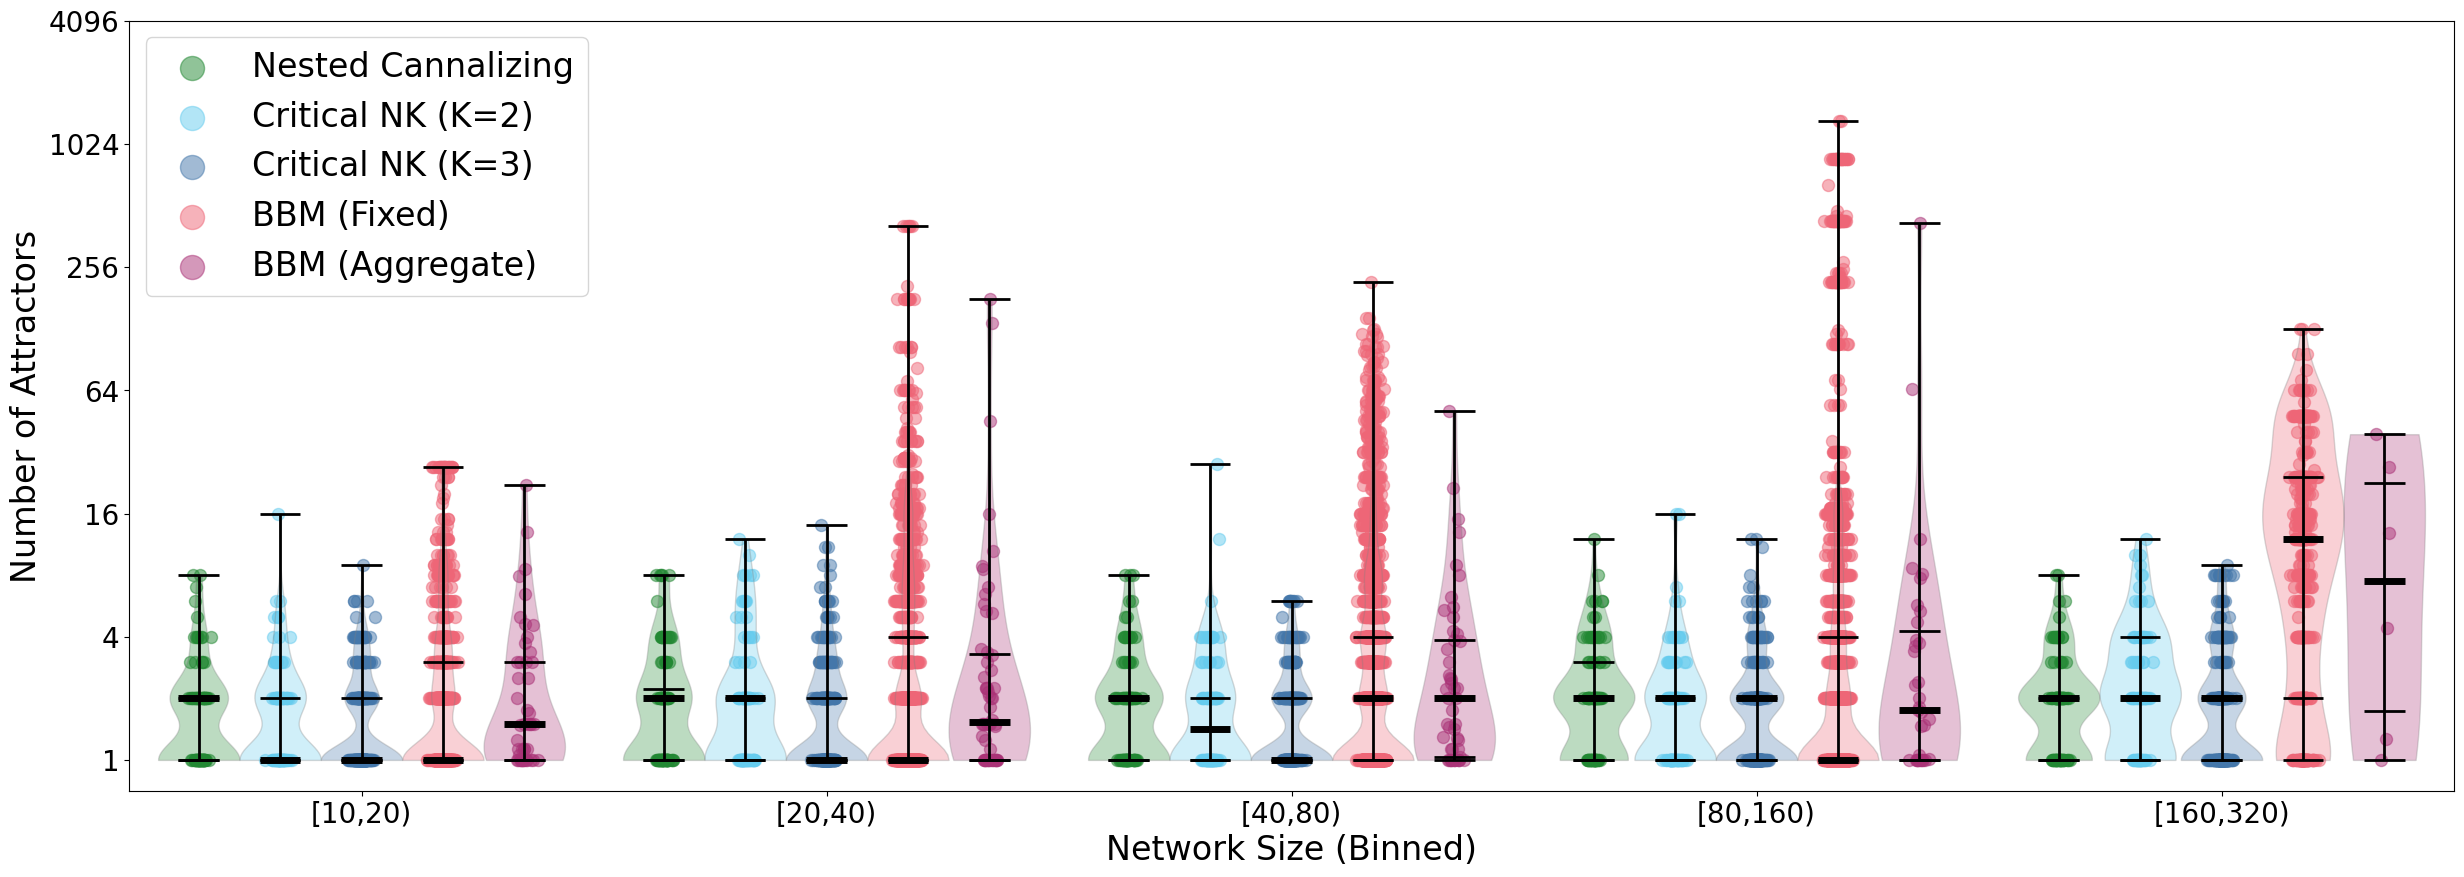

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
hscale = 0.175
for name_pos, (name, df) in enumerate(frames.items()):
    for bin in range(nbins + 1):
        arr = np.log2(
            # df["sd size"][(df["bin"] == bin) & (df["N"] >= 0) & (df["N"] < 640)]
            df["attractors"][(df["bin"] == bin) & (df["N"] >= 10) & (df["N"] < 320)]
        )
        arr = arr[~np.isnan(arr)]
        ax.scatter(
            bin + (name_pos - 2) * hscale + np.random.normal(0, 0.01, len(arr)),
            arr + 0 * np.random.normal(0, 0.025, len(arr)),
            alpha=0.5,
            color=network_type_colors[name],
            label=name if bin == 0 else None,
            s=75,
        )
        if len(set(arr)) > 4:
            vp = ax.violinplot(
                arr,
                [bin + (name_pos - 2) * hscale],
                widths=hscale,
                quantiles=[0.25, 0.75],
                showmedians=True,
            )
            for partname in vp:
                if partname == "bodies":
                    continue
                vp[partname].set_edgecolor("black")
                vp[partname].set_linewidth(2)

            vp["cmedians"].set_linewidth(5)
            # vp["cmeans"].set_color("red")

            for body in vp["bodies"]:
                body.set_facecolor(network_type_colors[name])
                body.set_edgecolor("grey")
                body.set_alpha(0.3)

ax.legend(fontsize=24, markerscale=2, loc="upper left")

ax.set_xlabel("Network Size (Binned)", fontsize=24)
ax.set_ylabel("Number of Attractors", fontsize=24)
xticks = ax.get_xticks().tolist()
ax.set_xticks(xticks)
ax.set_xticklabels([f"[{round(10*2**(x-1))},{round(10*2**x)})" for x in xticks])
# ax.set_xlim(-0.5, 6.5)
ax.set_xlim(0.5, 5.5)

yticks = ax.get_yticks().tolist()
ax.set_yticks(yticks)
ax.set_yticklabels([f"{round(2**x)}" for x in yticks])
ax.set_ylim(-0.5, 12)

ax.tick_params(labelsize=20)
fig.savefig("figures/attractor_scale.png", bbox_inches="tight")

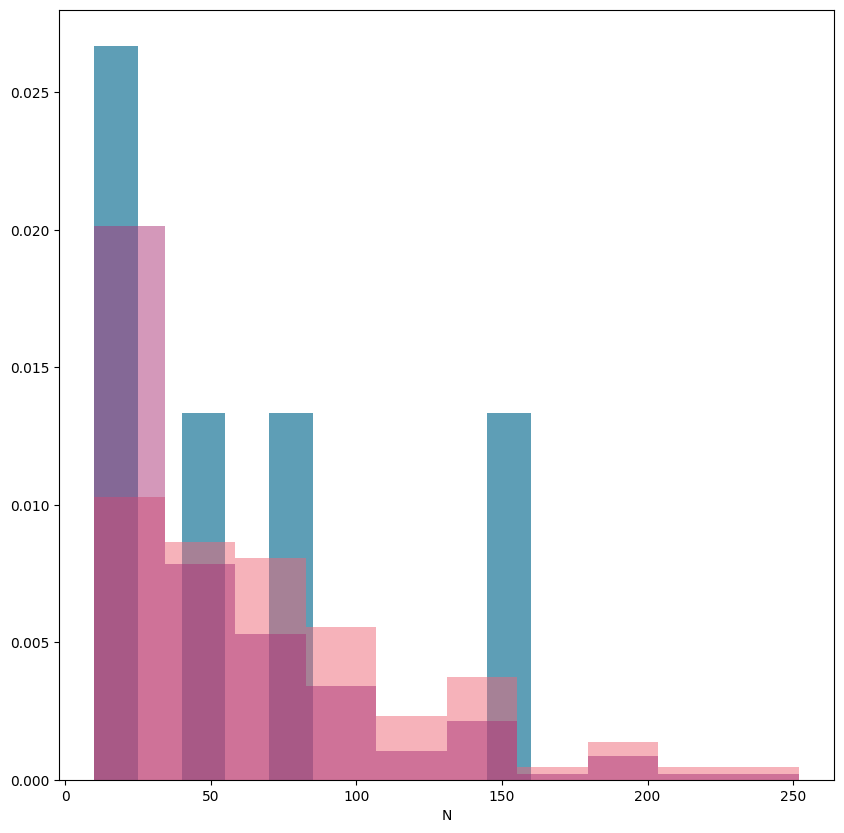

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for name, df in frames.items():
    ax.hist(
        df["N"][(df["N"] >= 10) & (df["N"] < 320)],
        label=name,
        color=network_type_colors[name],
        alpha=0.5,
        density=True,
    )

ax.set_xlabel("N")
print()

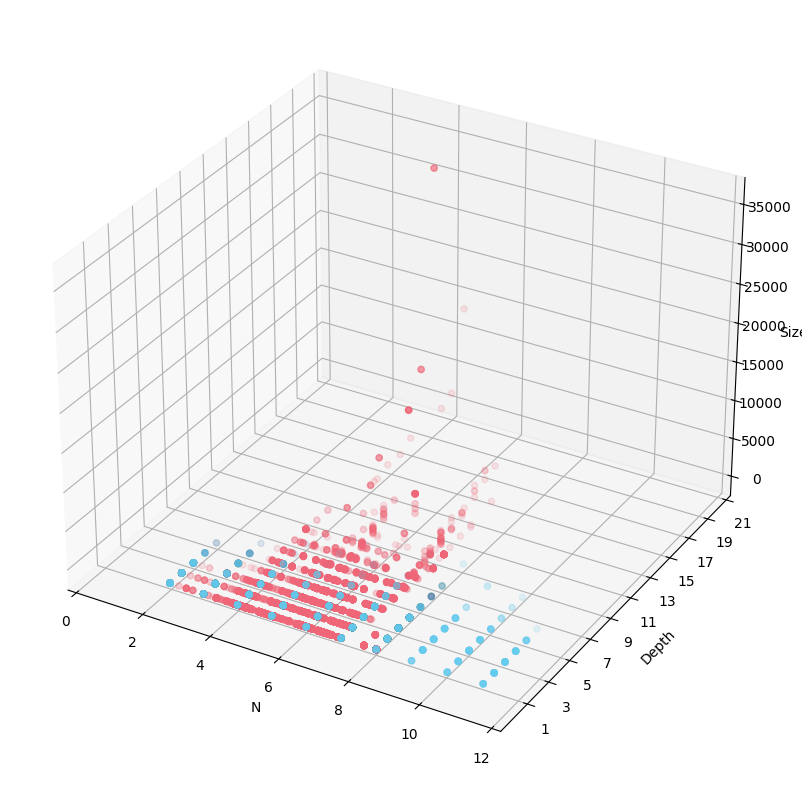

In [54]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
for name, frame in frames.items():
    ax.scatter(
        np.log2(frame["N"]),
        frame["depth"],
        frame["sd size"],
        label=name,
        color=network_type_colors[name],
        alpha=0.15,
    )

ax.set_xlabel("N")
ax.set_xlim(0, 12)
ax.set_ylabel("Depth")
ax.set_zlabel("Size")
ax.set_yticks(range(1, 22, 2))
print()